In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("train.csv")
data.describe(include="all")
#data[data.isnull().any(axis=1)]
#print(data)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [15]:
#z score outlier detection & omition
from scipy import stats
z = np.abs(stats.zscore(data))
print(z)
threshold = 3
print(np.where(z >3))
data_o=data[(z < 3).all(axis=1)]
data_o.shape#268,15

data_t=pd.read_csv("test.csv")
data_ty=pd.read_csv("submission_example.csv")
y_test=data_ty.drop("ID",axis=1)
data_t["medv"]=y_test

z = np.abs(stats.zscore(data_t))
print(z)
threshold = 3
print(np.where(z >3))
data_ot=data_t[(z < 3).all(axis=1)]
data_ot.shape#140,15

[[1.69301403 0.45687496 0.32290583 ... 0.43298984 1.06777158 0.13441853]
 [1.68624067 0.45401577 0.47212294 ... 0.43298984 0.47829937 0.12759925]
 [1.67269396 0.45332651 0.47212294 ... 0.40673324 1.35683968 1.16065484]
 ...
 [1.70721164 0.45156931 0.47212294 ... 0.43298984 0.48680137 0.23677333]
 [1.713985   0.4494593  0.47212294 ... 0.43298984 0.97424954 0.12350112]
 [1.72753171 0.4512778  0.47212294 ... 0.43298984 0.65684143 1.18658778]]
(array([ 35,  36,  37,  43,  44,  69,  96,  97, 104, 105, 108, 110, 110,
       138, 139, 140, 141, 142, 145, 146, 149, 150, 151, 154, 161, 163,
       176, 184, 185, 188, 189, 189, 190, 192, 194, 195, 230, 231, 233,
       234, 235, 236, 240, 242, 244, 246, 247, 248, 248, 261, 267, 268,
       268, 268, 269, 270, 271, 271, 272, 273, 274, 275, 275, 276, 277,
       278, 279, 282, 289, 295, 296, 305], dtype=int64), array([ 2,  2,  2,  2,  2, 12, 13,  4,  4, 12,  4,  4,  6,  2,  2,  2,  2,
        2,  4,  4,  4,  4,  4,  6,  4,  4,  6,  4,  4,  4,  2, 

(140, 15)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_o=pd.DataFrame(scaler.fit_transform(data_o))
#data=pd.DataFrame(data,columns=["ID","crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","black","lstat","medv"])
data_o.columns=["ID","crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","black","lstat","medv"]
data_o.describe(include="all")

data_ot=pd.DataFrame(scaler.fit_transform(data_ot))
data_ot.columns=["ID","crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","black","lstat","medv"]


In [18]:
x=data_o.drop("medv",axis=1)
x_train=x.drop("ID",axis=1)
y_train=data_o["medv"]

x_test=data_ot.drop("medv",axis=1)
x_test=x_test.drop("ID",axis=1)
y_test=data_ot["medv"]

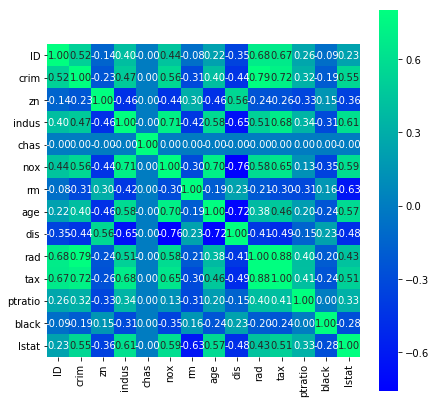

In [19]:
#correlation between features
import seaborn as sns
corrmat=x.corr()
f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(corrmat,vmax=0.8,square=True,annot=True,fmt=".2f",cmap="winter")

In [41]:
from sklearn.decomposition import PCA
pca=PCA(n_components=13,whiten=True)
x_pca=pd.DataFrame(pca.fit_transform(x_train))
#x_pca.columns=["crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","black","lstat"]
pca.explained_variance_ratio_

array([5.23865099e-01, 1.26579228e-01, 1.00067660e-01, 7.22028631e-02,
       4.38619864e-02, 3.43451042e-02, 2.28014927e-02, 2.03487500e-02,
       1.97873006e-02, 1.68216961e-02, 1.21009184e-02, 7.21790209e-03,
       3.67336417e-34])

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.917407,1.142684,-0.616174,0.463600,-0.477720,-0.667275,-0.741503,0.348512,1.025775,-0.213238,0.018480,1.336221,-0.455644
1,-0.655921,0.479915,0.493288,-0.569601,-0.663088,-0.024547,0.316656,-1.368072,0.745134,-0.065531,0.806607,0.143427,-0.747916
2,-1.222483,-0.290174,-0.347629,-1.140384,-0.094245,-0.688967,1.248725,-0.376634,0.361841,-0.852726,0.807404,0.698634,-1.805845
3,-1.146634,-0.149307,-0.342395,-1.241700,-0.596071,-0.349094,1.424387,-0.687755,0.015386,-0.894700,0.511051,0.644525,16.037079
4,-0.582819,0.624214,0.181077,1.502738,-0.512914,0.108444,0.107141,-1.375862,0.954353,-0.755678,0.098456,-0.278531,-0.024371
5,-0.369663,0.919863,0.323178,1.396330,-2.250068,1.420096,1.112359,-2.547068,0.320233,-1.099433,-0.593346,-0.383142,-0.175566
6,-0.525277,0.714113,0.256524,1.424079,-1.166072,0.607272,0.296397,-1.974676,1.640217,-1.004754,0.456151,-0.272115,-0.095058
7,-0.645412,0.243422,0.422043,2.128384,0.045708,-0.282608,0.480193,-0.834928,-0.462448,-0.861580,-0.873646,-0.307540,0.033386
8,-0.319066,-0.654920,0.942722,-1.040417,0.077712,-0.457220,0.042095,0.757729,1.007618,-1.040211,0.759239,0.686874,-0.150901
9,-0.145668,-0.267582,0.949662,-1.350029,-0.763199,0.053231,0.292121,0.459282,1.273791,-0.506101,0.724897,0.527827,-0.175564


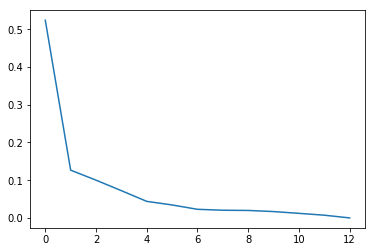

In [56]:
plt.plot(pca.explained_variance_ratio_)
x_pca


In [50]:
#Linear regression
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(x_pca,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
#lasso regression 

In [52]:
linear_model.score(x_pca,y_train)

0.7203774460125574

In [53]:
#important features 
predictors=x_pca.columns
weight=pd.Series(linear_model.coef_,predictors).sort_values()
print(weight)

0    -0.501208
2    -0.423563
3    -0.180343
11   -0.099129
6    -0.060987
5    -0.056551
8    -0.023340
7     0.007546
10    0.019380
12    0.051288
9     0.061924
4     0.140367
1     0.225399
dtype: float64


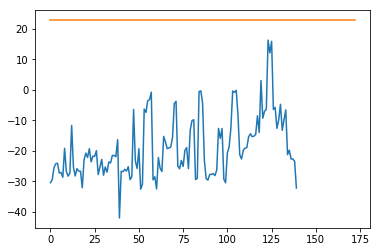

In [54]:

y_predict=linear_model.predict(x_test)
plt.plot(y_predict)
plt.plot(y_test)

In [55]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_predict,y_test)
mse
import math
rmse=math.sqrt(mse)
rmse

42.98631904545861